## POlar ENgagement through GUided INquiry (PENGUIN) 

## Rovibrational spectra - 3. Connection to blackbody radiation

### Learning Objectives
1. Learn how blackbody radiation is related to downwelling radiation from the atmosphere.
2. Learn how to use the Planck function and a downwelling radiance spectrum to estimate the surface temperature.

### Pre-class activities

1. Review your blackbody radiation module (Assignment 1) and Rovibrational spectra modules 1 and 2 as needed.

### Introduction

_Planck blackbody radiation spectrum as a function of wavenumber_  
In previous assignments, you plotted the energy density of a blackbody (e.g. the sun) as a function of wavelength ($\lambda$), and plotted downwelling radiance spectra as a function of wavenumber ($\nu$). How are these spectra of emitted radiation related? Here we will compare spectra of blackbody radiation to spectra of donwelling radiation from the atmosphere and see how such comparison is another way you can infer the temperature of the atmosphere.

To see how the radiation from a blackbody compares to the radiation from the atmosphere, we will imagine that we can turn the FTIR spectrometer to look at the blackbody, instead of looking at the sky. What spectrum will it record from the blackbody? 

The equation for the energy density was given to you as


<p style = 'text-align: right;'>
$\rho(\lambda, T) = \dfrac{8\pi hc} {\lambda^5\left(e^{hc\nu/ kT}-1\right)}$,
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad (1) $
</p>

where $\rho$ is the radiated energy density per unit wavelength $(\lambda)$, h is Planck's constant, c is the speed of light, T is the temperature, and k is the Boltzmann constant. 


The instrument doesn't actually measure the energy density; instead it measures something slightly different, which is given by the Planck function. This is just the energy distribution multiplied by c/(4$\pi$).

<p style = 'text-align: right;'>
$B(\lambda, T) = \dfrac{2 hc^2} {\lambda^5\left(e^{hc\nu/ kT}-1\right)}$,
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad (2) $
</p>

Finally, the downwelling radiance spectrum is given in terms of wavenumbers ($\widetilde{\nu}$), rather than wavelength ($ \lambda$). Recall that $\widetilde{\nu} = 1 / \lambda $. The blackbody radiation is written in terms of wavenumbers as follows


<p style = 'text-align: right;'>
$B( \widetilde{\nu}, T) = \dfrac{2 hc^2\widetilde{\nu}^3} {\left(e^{hc\widetilde{\nu}/ kT}-1\right)}$.
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad (3) $
</p>


### Part 1. Revisiting the Planck blackbody radiation spectrum


In [1]:
# Run this cell without modifying anything

# .. Load packages
from numpy import *
import scipy.io.netcdf as netcdf
from matplotlib.pyplot import *
import copy
import radtran

# .. Constants
h = 6.62607004e-34 # m2 kg / s
c = 2.99792458e8   # m / s
k = 1.38064852e-23 # J/K

# .. We'll be using the polar spectrum and the Oklahoma spectrum again, so load them in now.
#    Polar spectrum
with netcdf.netcdf_file('smtaerich1nf1turnX1.c1.20101228.000313.cdf', 'r') as f:
    nu_polar = copy.deepcopy(f.variables['wnum'][:])
    radiance_polar = copy.deepcopy(np.mean(f.variables['mean_rad'][3300:3375, :], axis=0))

#    Oklahoma spectrum
filename_oklahoma  = 'sgp_aeri_20170706.000443.txt' 
oklahoma_data = np.loadtxt(filename_oklahoma)
nu_oklahoma = oklahoma_data[:,0]
radiance_oklahoma = oklahoma_data[:,1]


Plot a blackbody radiation spectrum for a temperature of 6000 K as a function of wavenumber. Use the limits 100 to 4e6, with about 1000 points.

In [2]:
%matplotlib notebook

nu = linspace(100, 4e6, 1000)   # m-1

T = 6000
eterm = exp(h * c * nu / (k * T))
planck_function_6000K = 2 * h * c**2 * nu**3 / (eterm - 1)



<IPython.core.display.Javascript object>


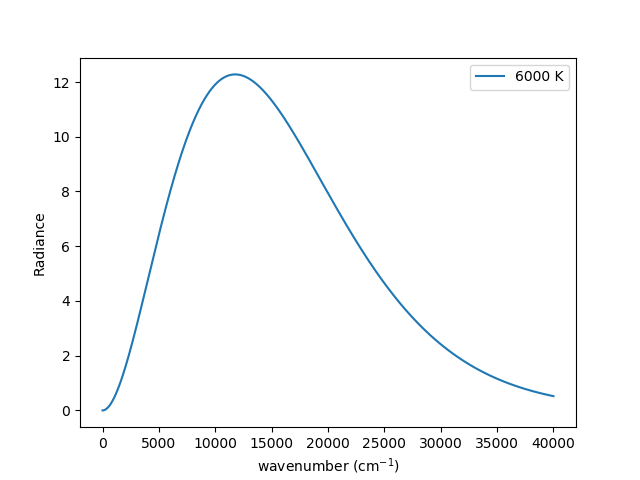

In [3]:
# Plot the blackbody radiation spectrum
# It is typical to plot spectra as a function of wavenumbers
# in cm^-1 rather than m^-1, so we divide nu by 100 below.
figure()
plot(nu/100, planck_function_6000K, label = '6000 K')
xlabel('wavenumber (cm$^{-1}$)')
ylabel('Radiance')
legend()

Recall that 6000 K is the temperature of the sun. How does this compare to the temperature of the atmosphere? 
In the cell below, create a Planck fuction as was done above, but for 300 K, the typical temperature of the near-surface atmosphere. Then replot the sun spectrum together with the 300 K spectrum. Again use nu/100 when plotting.

<IPython.core.display.Javascript object>


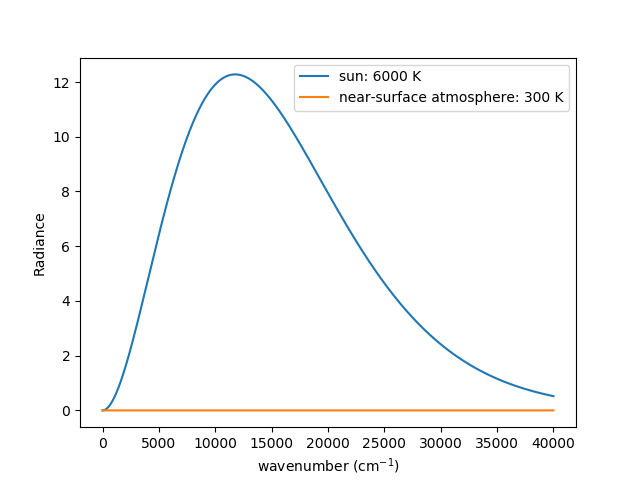

In [4]:
T = 300
eterm = exp(h * c * nu / (k * T))
planck_function_300K = 2 * h * c**2 * nu**3 / (eterm - 1)

figure()
plot(nu/100, planck_function_6000K, label = 'sun: 6000 K')
plot(nu/100, planck_function_300K, label = 'near-surface atmosphere: 300 K')
xlabel('wavenumber (cm$^{-1}$)')
ylabel('Radiance')
legend()


The spectrum for 300 K looks like it's at 0. In order to see the shapes of both, below we replot them but using different y-axis: the left axis represents the 300 K spectrum, while the right axis represents the 6000 K spectrum.

<IPython.core.display.Javascript object>


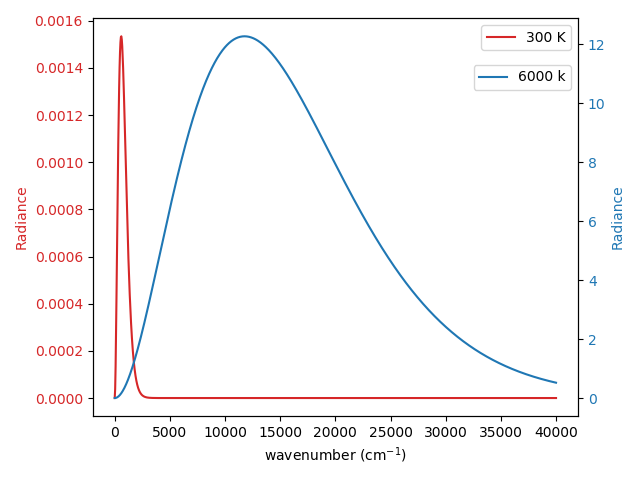

In [5]:
fig, ax1 = subplots()

color = 'tab:red'
ax1.set_xlabel('wav')
ax1.set_ylabel('Energy density', color=color)
ax1.plot(nu/100, planck_function_300K, color=color, label='300 K')
ax1.tick_params(axis='y', labelcolor=color)
xlabel('wavenumber (cm$^{-1}$)')
ylabel('Radiance')
ax1.legend(loc='best')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Radiance', color=color)  # we already handled the x-label with ax1
ax2.plot(nu/100, planck_function_6000K, color=color, label = '6000 k')
ax2.tick_params(axis='y', labelcolor=color)
xlabel('wavenumber (cm$^{-1}$)')
ylabel('Radiance')
ax2.legend(bbox_to_anchor=(0,0,1,.9))


fig.tight_layout()  # otherwise the right y-label is slightly clipped



How do the peaks compare? Discuss the magnitudes and wavenumber.

### Pause for Anaysis
1. Look back at your CGI on blackbody radiation. How does the plot for the temperature of the sun compare to what you plotted earlier?
2. Looking at the plot above, how does the position of the peak in wavenumbers change with temperature?

### Part 2. Revisiting the polar downwelling radiance spectrum

### Try your skill  
In the following you will replot the polar spectrum you used previously, as well as the spectrum for your model atmosphere:
1. Multiply the H$_2$O by 10 and run the cell below.
2. Repeat step 1 until the spectrum for your model atmosphere stops changing.


<IPython.core.display.Javascript object>


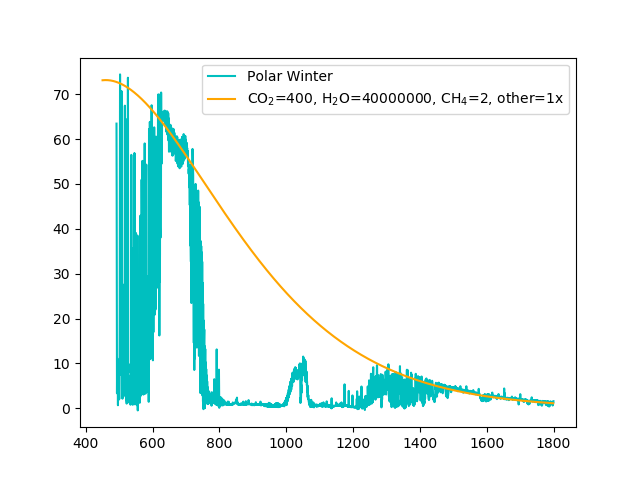

In [6]:
# Modify the following according to the instructions.
co2 = 400
h2o = 40000000
ch4 = 2
other = 1
dT = 0

# Run a function that gets the radiance for your model atmosphere (do not modify)
nu_my_atmosphere, radiance_my_atmosphere, my_legend = radtran.get_my_radiance(
    co2, h2o, ch4, other, dT)

# Plot the spectrum for your atmosphere together with the Oklahoma and polar spectra
# (no need to modify this)
fig = figure()
plot(nu_polar, radiance_polar, 'c')
plot(nu_my_atmosphere, radiance_my_atmosphere, color='orange')
legend(['Polar Winter', my_legend])



### Pause for analysis
1. Does the shape of this curve remind you of anything?  
2. What happens if you continue to increase H$_2$O?  
3. How does this help explain why some of the strongest features do not have a an M-shape?


### Part 2. Comparing the polar spectrum to a blackbody function

Below we plot the spectrum from your atmosphere as well as the polar spectrum. 

Add your blackbody function at 300 K to the plot. Don't forget to divide nu by 100. You also need to multiply your blackbody function by 10^5 because the polar spectrum was scaled by that amount.

<IPython.core.display.Javascript object>


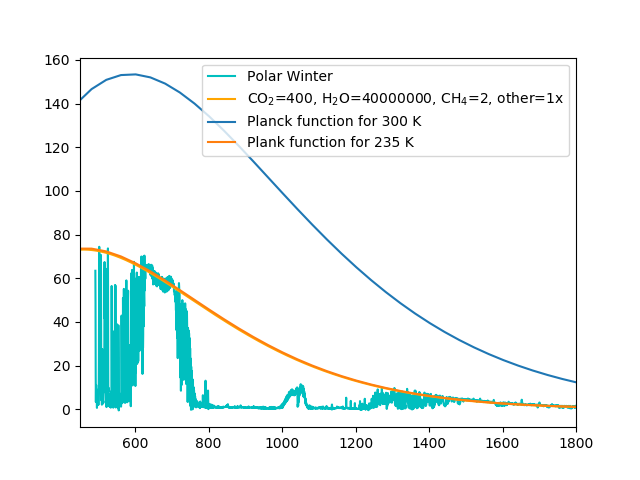

(450, 1800)

In [7]:
# Plot the spectrum from your model atmosphere and the polar winter.
fig = figure()

plot(nu_polar, radiance_polar, 'c', label = 'Polar Winter')
plot(nu_my_atmosphere, radiance_my_atmosphere, color='orange', label = my_legend)
plot(nu/100, 1e5*planck_function_300K, label = 'Planck function for 300 K')  # add the Planck function for 300 K here
legend()

# Zoom in on the region of interest
xlim([450, 1800])

Plot blackbodies at different temperatures until you feel that you have matched the polar spectrum well between 640 and 700 cm$^{-1}$. Zoom in and out as needed.

In [8]:
T = 235
eterm = exp(h*c*nu/(k*T))
planck_function_my_temperature = 2*h*c**2*nu**3/(eterm-1)

plot(nu/100, 1e5*planck_function_my_temperature, label = 'Plank function for ' +str(T) + ' K')
legend()

### Pause for analysis
1. What temperature produces the best fit?  

In Part 1 you discovered that when you max out the H$_2$O in the atmosphere, you get a blackbody function. Furthermore, if you continue increasing the H$_2$O after this point, the function does not change. In Part 2 you learned that the magnitude of the blackbody function depends on temperature.

Maxing-out to a blackbody function represents the worst-case scenario for the greenhouse effect. This is what happens in a positive feedback mechanism known as the _runaway greenhouse_. Temperature increases, causing water to evaporate from the oceans, which increases the H$_2$O emission, which increases temperature, and so on until the oceans have boiled away. Climate scientists do not think this will happen on Earth. But it is believed to have happened on Venus and explains why Venus is so much hotter than expected based on proximity to the sun. 


### Part 3. Comparing the Oklahoma spectrum to a blackbody function
You have determined the temperature of the surface for the polar spectrum. Next you will determine the surface temperature for the Oklahoma spectrum. 

Add your blackbody function to the plot. Don't forget to divide nu by 100. You also need to multiply your blackbody function by 10$^5$ (1e5) because the Oklahoma and polar spectra were scaled by that amount.

You might be able to guess the temperature for Oklahoma based on what you did in the first ro-vibrational module. If so, start with that as your first guess below.

<IPython.core.display.Javascript object>


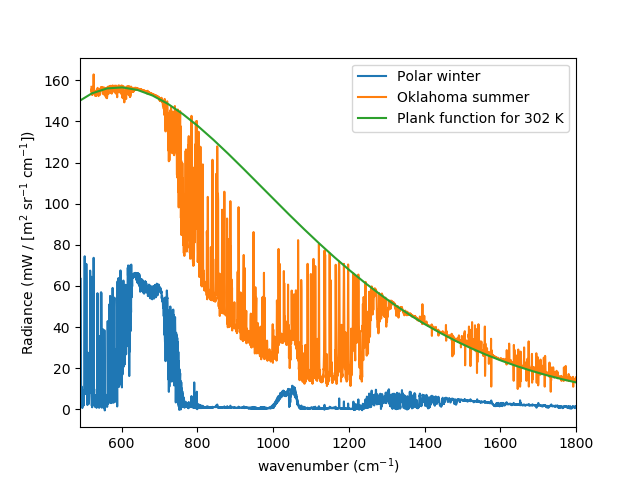

In [9]:
# Plot the Oklahoma spectrum together with the polar spectrum
figure()
plot(nu_polar, radiance_polar, label = 'Polar winter')
plot(nu_oklahoma, radiance_oklahoma, label = 'Oklahoma summer')

xlim([490, 1800])          
xlabel('wavenumber (cm$^{-1}$)')
ylabel('Radiance (mW / [m$^2$ sr$^{-1}$ cm$^{-1}$])')


# Create and plot blackbody function below. 
T = 302
eterm = exp(h*c*nu/(k*T))
planck_function_my_temperature = 2*h*c**2*nu**3/(eterm-1)

plot(nu/100, 1e5*planck_function_my_temperature, label = 'Plank function for ' +str(T) + ' K')
legend()

### Pause for Analysis: polar vs. mid-latitude spectra

1. What temperature produces the best fit for the Oklahoma summer spectrum?
2. How does that compare to the temperature for the polar winter?
3. Are these realistic temperatures for these regions (convert to Fahrenheit or Celsius as needed)?


What part of the atmosphere does this temperature correspond to? The downwelling radiance is coming from emission by gases in the atmosphere, so we can say that this is the temperature somewhere in the atmosphere. You have been fitting to the strongest CO2 and H2O bands. Close to the center of this band, which is the region you have been using for fitting, emission is so strong that the emission you are seeing originates from CO2 molecules right above the instrument. Thus the temperature corresponds to the near-surface temperature.

### Post-activity reflection
1. Briefly describe the two techniques you used to determine the atmospheric temperature from a downwelling radiation spectrum.
2. How does this topic - absorption and emission of greenhouse gases via ro-vibrational transitions - impact your life?

### Extra stuff 

<IPython.core.display.Javascript object>


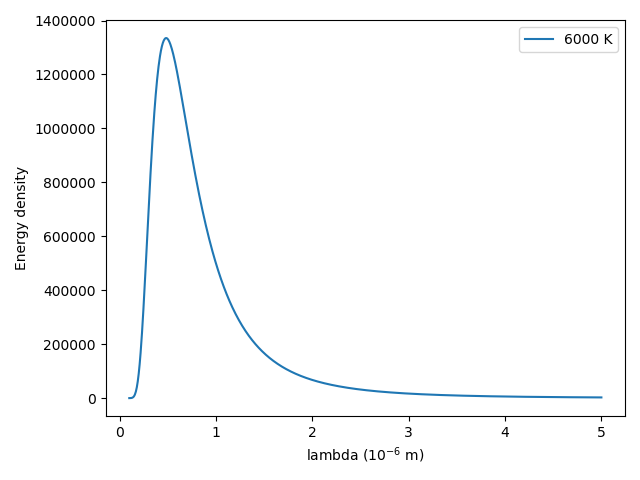

In [10]:
lam = linspace(1e-7,5e-6,1000); 
T = 6000
eterm = exp(h*c/(lam*k*T))
rho_6000 = 8*pi*h*c/(lam**5*(eterm-1))

figure()
plot(lam*1e6,rho_6000)
legend(['6000 K'])
xlabel('lambda (10$^{-6}$ m)')
ylabel('Energy density')

tight_layout()  # prevent labels from being clipped


<IPython.core.display.Javascript object>


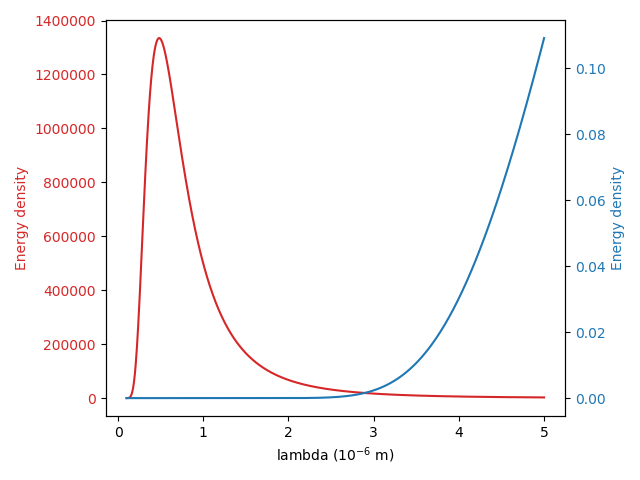

In [11]:
lam = linspace(1e-7,5e-6,1000); 
T = 300
eterm = exp(h*c/(lam*k*T))
rho_300 = 8*pi*h*c/(lam**5*(eterm-1))


fig, ax1 = subplots()

color = 'tab:red'
ax1.set_xlabel('lambda (10$^{-6}$ m)')
ax1.set_ylabel('Energy density', color=color)
ax1.plot(lam*1e6,rho_6000, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy density', color=color)  # we already handled the x-label with ax1
ax2.plot(lam*1e6, rho_300, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

